In [1]:
%matplotlib notebook
import monkdata as m
import numpy as np
from dtree import entropy
from dtree import averageGain
import dtree as d


import matplotlib.pyplot as plt
import random

In [2]:
print(entropy(m.monk1), 'monk1')
print(entropy(m.monk2), 'monk2')
print(entropy(m.monk3), 'monk3')

1.0 monk1
0.957117428264771 monk2
0.9998061328047111 monk3


In [3]:
for i in range(6):
    print("\nattribute ", i + 1)
    print(averageGain(m.monk1, m.attributes[i]))
    print(averageGain(m.monk2, m.attributes[i]))
    print(averageGain(m.monk3, m.attributes[i]))
    



attribute  1
0.07527255560831925
0.0037561773775118823
0.007120868396071844

attribute  2
0.005838429962909286
0.0024584986660830532
0.29373617350838865

attribute  3
0.00470756661729721
0.0010561477158920196
0.0008311140445336207

attribute  4
0.02631169650768228
0.015664247292643818
0.002891817288654397

attribute  5
0.28703074971578435
0.01727717693791797
0.25591172461972755

attribute  6
0.0007578557158638421
0.006247622236881467
0.007077026074097326


In [4]:
max([1,2,3,4])


4

In [5]:
def find_max_attr(dataset):
    max_attr = [ averageGain(dataset, m.attributes[i]) for i in range(6) ]
    return(max_attr.index(max(max_attr)))

In [10]:
a5_1 = d.select(m.monk1, m.attributes[4], 1)
a5_2 = d.select(m.monk1, m.attributes[4], 2)
a5_3 = d.select(m.monk1, m.attributes[4], 3)
a5_4 = d.select(m.monk1, m.attributes[4], 4)

print(find_max_attr(a5_1), 'value 1') # 1
print(find_max_attr(a5_2), 'value 2') # 4
print(find_max_attr(a5_3), 'value 3') # 6
print(find_max_attr(a5_4), 'value 4') # 1

from drawtree_qt5 import drawTree 
t=d.buildTree(m.monk1, m.attributes,3)

drawTree(t)


0 value 1
3 value 2
5 value 3
0 value 4


SystemExit: 0

In [6]:
# build tree


t1=d.buildTree(m.monk1, m.attributes)
print(d.check(t1, m.monk1test))
t2=d.buildTree(m.monk2, m.attributes);
print(d.check(t2, m.monk2test))
t3=d.buildTree(m.monk3, m.attributes);
print(d.check(t3, m.monk3test))

print("")
print(d.check(t1, m.monk1))
print(d.check(t2, m.monk2))
print(d.check(t3, m.monk3))


0.8287037037037037
0.6921296296296297
0.9444444444444444

1.0
1.0
1.0


In [7]:

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]


In [8]:

def pruning(tree, validation):    
    next_tree_accuracy = 1
    current_tree_accuracy = d.check(tree, validation)
    while (next_tree_accuracy > current_tree_accuracy):
        current_tree_accuracy = d.check(tree, validation)
        pruned_trees = d.allPruned(tree)
        accuracy_pruned_trees = [d.check(t, validation) for t in pruned_trees]
        index_of_max_tree = accuracy_pruned_trees.index(max(accuracy_pruned_trees))
        next_tree_accuracy = accuracy_pruned_trees[index_of_max_tree]
        if (next_tree_accuracy > current_tree_accuracy):            
            tree = pruned_trees[index_of_max_tree]  
    return tree
        

In [11]:
fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
results_aggre_monk1 = []
results_aggre_monk3 = []
for _ in range(200):
    results_monk1 = []
    results_monk3 = []
    for f in fractions:
        monk1train, monk1val = partition(m.monk1, f)
        monk3train, monk3val = partition(m.monk3, f)
        t1_prune =d.buildTree(monk1train, m.attributes)
        t3_prune =d.buildTree(monk3train, m.attributes)
        pruned_tree1 = pruning(t1_prune, monk1val)
        pruned_tree3 = pruning(t3_prune, monk3val)
        results_monk1.append(d.check(pruned_tree1, m.monk1test))
        results_monk3.append(d.check(pruned_tree3, m.monk3test))
    results_aggre_monk1.append(results_monk1)
    results_aggre_monk3.append(results_monk3)
#print(results_aggre_monk1)
#print(results_aggre_monk3)

print(" BEFORE PRUNING ")
t1=d.buildTree(m.monk1, m.attributes)
print(d.check(t1, m.monk1test))
t3=d.buildTree(m.monk3, m.attributes);
print(d.check(t3, m.monk3test))


 BEFORE PRUNING 
0.8287037037037037
0.9444444444444444


[0.03577659 0.04374218 0.0405167  0.04817089 0.04793341 0.04349281]
[0.05336622 0.04558895 0.03226618 0.02815687 0.03006078 0.0349562 ]


<IPython.core.display.Javascript object>


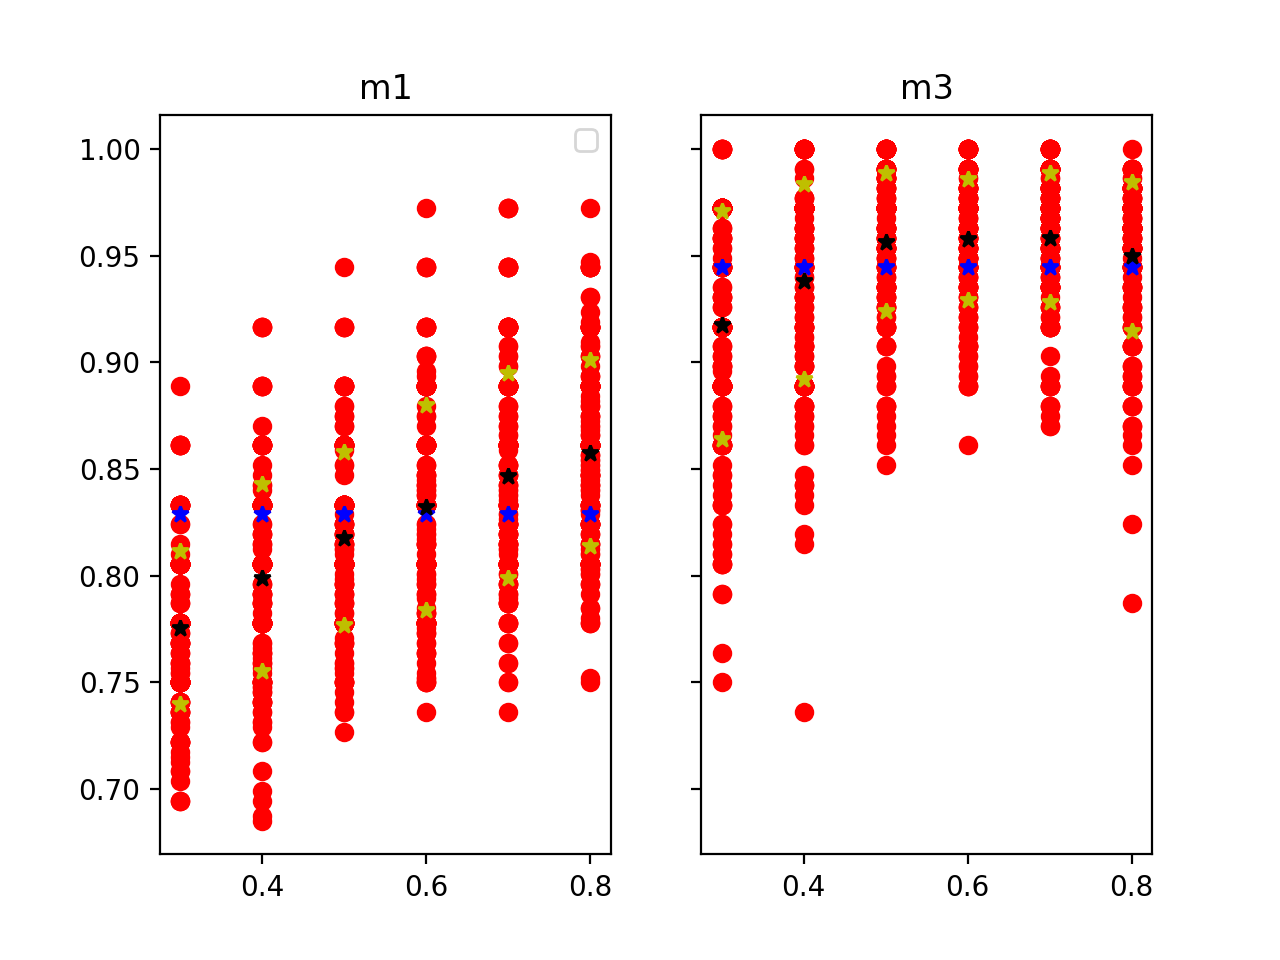

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x121c01390>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x1219aa9e8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


In [21]:
import statistics
zip_results1 = zip(*results_aggre_monk1)
zip_results3 = zip(*results_aggre_monk3)
zip_1 = list(zip_results1)
zip_3 = list(zip_results3)

m1_mean = np.array([statistics.mean(res) for res in zip_1])
m3_mean = np.array([statistics.mean(res) for res in zip_3])
m1_stdev = np.array([statistics.stdev(res) for res in zip_1])
m3_stdev = np.array([statistics.stdev(res) for res in zip_3])
print(m1_stdev)
print(m3_stdev)
upperbound_1 = m1_mean + m1_stdev
lowerbound_1 = m1_mean - m1_stdev
upperbound_3 = m3_mean + m3_stdev
lowerbound_3 = m3_mean - m3_stdev

#print(statistics.stdev())



f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

for m3acc in results_aggre_monk3: 
    ax2.plot(fractions, m3acc, 'or')
for m1acc in results_aggre_monk1: 
    ax1.plot(fractions, m1acc, 'or')

ax1.set_title('m1')
ax2.set_title('m3')

lines = []
lines.append(ax1.plot(fractions, [d.check(t1, m.monk1test) for _ in fractions], '*b'))
ax2.plot(fractions, [d.check(t3, m.monk3test) for _ in fractions], '*b')
lines.append(ax1.plot(fractions, upperbound_1, '*y'))
ax1.plot(fractions, lowerbound_1, '*y')
ax2.plot(fractions, upperbound_3, '*y')
ax2.plot(fractions, lowerbound_3, '*y')

ax1.legend((lines[0], lines[1]), ('h', 'y'))
ax1.plot(fractions, m1_mean, '*k')
ax2.plot(fractions, m3_mean, '*k')


plt.show()
